<a href="https://colab.research.google.com/github/mperaltarj/reconhecimento_praga_rede_convolucional/blob/main/reconhecimento_praga_rede_convolucional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **Redes Neurais Convolucionais**


**Origem do Dataset**
Repositório Digipathos

**Links Úteis**
Doenças de Tomate - Embrapa

**Descriçao**
O objetivo deste notebook é Redes Neurais Convolucionais.
Este projeto foi realizado e adaptado, com base no projeto realizado no evento coding the future reconhecimento de pragas com redes neurais realizado pela DIO e ministrado pelo professor Maycon Cypriano.

Repositório original: https://github.com/batestin1/coding_the_future_reconhecimento_de_pragas_com_redes_neurais/blob/main/notebook/cnn_para_doencas_de_folhas.ipynb

Vamos treinar nosso modelo para que ele aprenda a detectar doença em plantações de tomate.

**Dicionário**
Class | Type | Description | Link para mais informações | ----------------------------------------------------------|:---------:|:-------------------------------------------:|:---------------------------:| virus_mosaico_do_tomate_Y |Class | O agente causal da risca-do-tomateiro (PVY) ocorre de forma restrita em lavoruas de tomate no Brasil. São poucas as plantas hospedeiras do vírus. A transmissão é feita por pulgões, que adquirem o vírus em uma planta doente. | Link | mancha_alvo |Class | A mancha-alvo, causada pelo fungo Corynespora cassiicola, é uma das principais doenças da soja e uma grande ameaça à agricultura brasileira, uma vez que sua incidência vem aumentando nas últimas safras. | Link | mancha_bacteriana |Class | A mancha-bacteriana é uma bacteriose de importância econômica secundária para a cultura da berinjela, jiló, pimenta e tomate, porém causa grandes perdas na cultura do pimentão. Danos: A bactéria pode ocorrer em todos os estágios de desenvolvimento da planta. | Link | virus_folha_amarela | Class | A doença da folha amarela, uma das principais pragas da cana-de-açúcar no Brasil, é causada por um vírus resistente ao tratamento térmico transmitido pelo pulgão Melanaphis sacchari | Link | requeima | Class | A requeima causa manchas encharcadas, grandes e escuras nas folhas e nas brotações jovens, evoluindo para uma "queima" ou "mela" geral da planta (Figura 1). Na face inferior da lesão observa-se um mofo pulverulento esbranquiçado, que é a esporulação do fungo. Nos frutos, a prodidão é dura, de coloração marrom-escura. | Link | enrolamento_de_folha | Class | O sintoma do enrolamento da folha pode ocorrer em plantas jovens produzidas sob cobertura e plantadas no campo durante os períodos úmidos. Geralmente é observado mais tarde, em plantas com pelo menos 3 buquês e no período de verão. | Link | pinta_preta | Class | A pinta preta, causada por Alteranaria solani, é uma das doenças mais importantes na cultura do tomate. Manejá-la exige a integração de medidas que incluem o uso de fungicidas aplicados preventivamente ou assim que aparecerem os primeiros sintomas. | Link | acaros | Class | Costuma se alojar na face inferior de folíolos – onde deposita seus ovos – e brotos, na região apical da planta. Infesta qualquer estádio de desenvolvimento do tomateiro. Adultos e ninfas perfuram e sugam as células da epiderme vegetal. | Link | folhas_saudaveis | Class | Saúde dos Tomates mancha_septoria | Class | A septoriose ou mancha-de-septoria é uma doença importante do tomateiro nas épocas de chuva, ocorrendo em quase todas as regiões produtoras do Brasil e do mundo (Jones et al., 1991; Kurozawa & Pavan, 1997; Zambolim et al., 2000). | Link|

In [ ]:
!pip uninstall pandas -y
!pip install pandas

ERROR: Operation cancelled by user


In [20]:
!git clone https://github.com/mperaltarj/reconhecimento_praga_rede_convolucional.git #clona o repositorio
!mv clone/dataset /content/
!mv clone/modelos /content/models
!rm -rf clone
!rm -rf modelos
!rm -rf sample_data

Cloning into 'reconhecimento_praga_rede_convolucional'...
remote: Enumerating objects: 10049, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 10049 (delta 1), reused 2 (delta 0), pack-reused 10043
Receiving objects: 100% (10049/10049), 161.48 MiB | 31.43 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Updating files: 100% (10036/10036), done.
mv: cannot stat 'clone/dataset': No such file or directory
mv: cannot stat 'clone/modelos': No such file or directory


In [23]:
import numpy as np # para criação de matrizes
import os # para manipulação de folders e arquivos
import cv2 # para manipular imagens
import matplotlib.pyplot as plt # para visualização de imagens
import random # para gerar números aleatórios
from keras.models import Sequential # para iniciar nossa rede neural
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout # camadas da rede neural
from tensorflow.keras.preprocessing import image # para testar o resultado
from keras.layers import Rescaling # para transformar RGB em 0 e 1
from tensorflow.keras.preprocessing.image import ImageDataGenerator # para o pré-processamento de imagens
from tensorflow.keras.utils import plot_model # para visualizar nossa rede!
from keras.models import load_model # para salvar modelos do keras

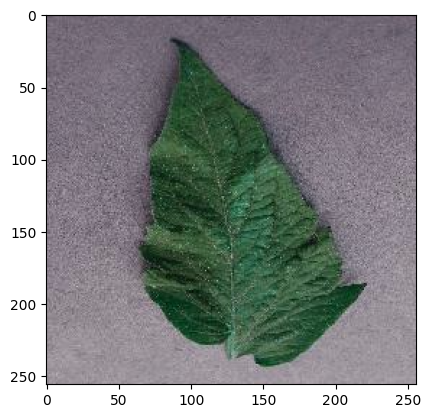

array([[[115, 105, 118],
        [115, 105, 118],
        [116, 106, 119],
        ...,
        [107,  94, 108],
        [108,  95, 109],
        [109,  96, 110]],

       [[112, 102, 115],
        [112, 102, 115],
        [112, 102, 115],
        ...,
        [106,  93, 107],
        [107,  94, 108],
        [108,  95, 109]],

       [[106,  96, 108],
        [105,  95, 108],
        [104,  95, 107],
        ...,
        [105,  92, 106],
        [106,  92, 107],
        [106,  93, 107]],

       ...,

       [[156, 148, 155],
        [152, 144, 151],
        [146, 138, 145],
        ...,
        [158, 151, 158],
        [160, 153, 160],
        [161, 154, 161]],

       [[158, 150, 157],
        [154, 146, 153],
        [147, 139, 146],
        ...,
        [159, 152, 159],
        [161, 154, 161],
        [162, 155, 162]],

       [[159, 151, 158],
        [155, 147, 154],
        [148, 140, 147],
        ...,
        [159, 152, 159],
        [161, 155, 161],
        [163, 156, 163]]], dtype=uint8)
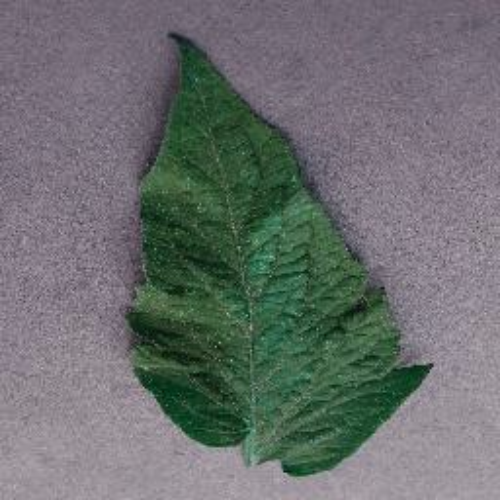

In [24]:
# Conhecendo as imagens
imagem = cv2.imread(r'/content/reconhecimento_praga_rede_convolucional/content/dataset/test/acaros_de_duas_manchas/00bc7858-1dca-4bfb-a828-225f03bd72a5___Com.G_SpM_FL 9455.JPG')


imagem.shape # pega a forma da imagem
plt.imshow(imagem) # visualizando as imagens
plt.show()
cv2.resize(imagem, (500,500)) # remodulando a imagem

In [25]:
# Pre Processamento das Imagens e Análises dela
train = ImageDataGenerator(rescale=1/255.0) # criando um objeto train_test com valor de convergencia, ou se preferir, normalizando as imagens de 1 a 255
test = ImageDataGenerator(rescale=1/255.0) # criando um objeto train_test com valor de convergencia, ou se preferir, normalizando as imagens de 1 a 255
train # para visualizar o objeto

Found 9191 images belonging to 10 classes.
Found 840 images belonging to 10 classes.


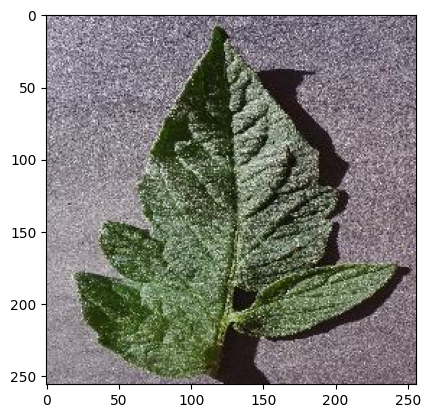

In [26]:
# criando nosso gerador de treino e teste
conjunto_treino = train.flow_from_directory(r'/content/reconhecimento_praga_rede_convolucional/content/dataset/train', target_size=(256,256), batch_size=32, class_mode='categorical')
conjunto_teste = test.flow_from_directory(r'/content/reconhecimento_praga_rede_convolucional/content/dataset/test', target_size=(256,256), batch_size=32, class_mode='categorical')
conjunto_treino.class_indices # visualizando nossas classes, e os valores de cada uma
conjunto_treino[0]
len(conjunto_treino)
conjunto_treino[0][0][2]
conjunto_treino[0][1][2]
conjunto_treino.image_shape # visualizando o formato do nosso conjunto de treino
# conjunto_treino.shape
plt.imshow(conjunto_treino[0][0][0]) # visualizando as imagens
plt.show()
labels = [k for k in conjunto_treino.class_indices] # atribuindo a variavel label, os nome das nossas classes
labels
amostra_de_treino = conjunto_treino.__next__()
images = amostra_de_treino[0] # aqui é só a matriz de imagens
nomes = amostra_de_treino[1] # aqui é só a matriz das classes

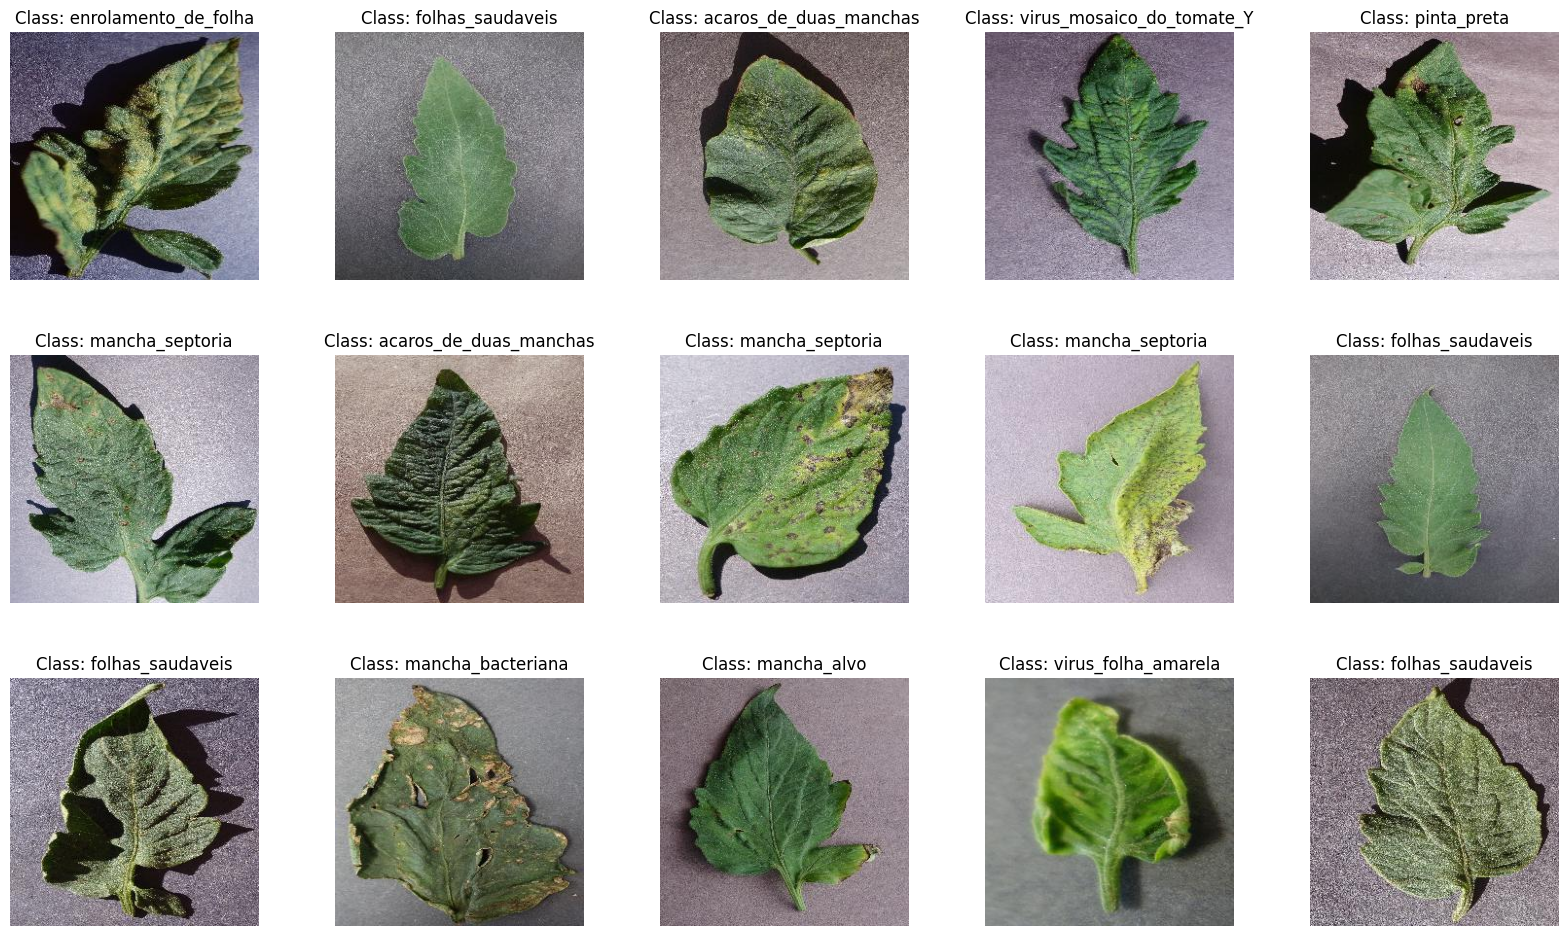

In [27]:
# visualizando nossas imagens, agora com subplots
plt.figure(figsize = (20 , 20))

for i in range(15):
    plt.subplot(5 , 5, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    plt.imshow(images[i])
    plt.title(f'Class: {labels[np.argmax(nomes[i],axis=0)]}')
    plt.axis("off")

In [28]:
# Construindo a CNN
# Inicializando a rede
cnn = Sequential()
cnn
# Adicionando camadas de convolução
# Conv2D(32, (3, 3) O primeiro parametro (32) é o número de detectores de característica. O (3,3) é filter detector
cnn.add(Rescaling(1./255, input_shape=(256, 256, 3)))  # Normalizando as imagens
cnn.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', name='Camada_Convolucional_1'))
# adicionando a camada de pooling
cnn.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid', name='Camada_MaxPooling_1'))

# adicionando a segunda camada de convolução
# se a primeira aplicamos 32 filtros, a segunda duplicamos
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', name='Camada_Convolucional_2'))

# adicionando a segunda camada de pooling
cnn.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid', name='Camada_MaxPooling_2'))

# adicionando a camada de flattening
cnn.add(Flatten(name='Camada_Flattening')) # flattening nao precisa ajustar parâmetros

# adicionando o full connect (a camada oculta)
cnn.add(Dense(units=1024, activation='relu', name='Camada_FullConnect'))

# para corrigir overfitting
cnn.add(Dropout(rate = 0.5, name='Camada_de_Dropout'))

# camada de saída
cnn.add(Dense(units = 10, activation = 'softmax', name='Camada_de_saida'))

# visualizando nossa rede
cnn.summary()

# Compilando a rede
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 Camada_Convolucional_1 (Co  (None, 254, 254, 32)      896       
 nv2D)                                                           
                                                                 
 Camada_MaxPooling_1 (MaxPo  (None, 127, 127, 32)      0         
 oling2D)                                                        
                                                                 
 Camada_Convolucional_2 (Co  (None, 125, 125, 64)      18496     
 nv2D)                                                           
                                                                 
 Camada_MaxPooling_2 (MaxPo  (None, 62, 62, 64)        0         
 oling2D)                                             

In [ ]:
# treinando a rede
cnn.fit(x = conjunto_treino, validation_data = conjunto_teste, epochs = 5)

Epoch 1/5
 12/288 [>.............................] - ETA: 40:40 - loss: 2.2809 - accuracy: 0.1016

In [ ]:
# Teste
resposta = cnn.predict(conjunto_teste)
cnn.evaluate(conjunto_teste)

# Testando na prática
imagem = conjunto_teste[0][0][0]
plt.imshow(imagem)
plt.show()

conjunto_teste[0][0][0].shape

conjunto_treino.class_indices

In [ ]:
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(256, 256))  # Use o mesmo tamanho usado para treino
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    # Normalizar a imagem se necessário
    img_array /= 255.0  # Normalização pode variar dependendo do preprocessamento

    # Fazer a previsão
    prediction = cnn.predict(img_array)

    # Obter o índice da classe com a maior probabilidade
    predicted_class = np.argmax(prediction, axis=1)[0]

    for keys, values in conjunto_treino.class_indices.items():
        if values == predicted_class:
            if values == 0:
                return f"A imagem é referente a doenca de {keys.replace('_','').upper()} e o cuidado para tal você pode encontrar aqui: https://agriculture.basf.com/br/pt/conteudos/cultivos-e-sementes/tomate/tipos-acaro.html"
            if values == 1:
                return f"A imagem é referente a doenca de {keys.replace('_','').upper()} e o cuidado para tal você pode encontrar aqui: http://ephytia.inra.fr/pt/C/5334/Tomate-Enrolamento-Fisiologico-das-Folhas"
            if values == 2:
                return f"A imagem refere-se a uma folha saudável"
            if values == 3:
                return f"A imagem é referente a doenca de {keys.replace('_',' ').upper()} e o cuidado para tal você pode encontrar aqui: https://agriculture.basf.com/br/pt/conteudos/cultivos-e-sementes/soja/mancha-alvo-principais-sintomas.html"
            if values == 4:
                return f"A imagem é referente a doenca de {keys.replace('_',' ').upper()} e o cuidado para tal você pode encontrar aqui: https://www.agrolink.com.br/problemas/mancha-bacteriana_1666.html"
            if values == 5:
                return f"A imagem é referente a doenca de {keys.replace('_',' ').upper()} e o cuidado para tal você pode encontrar aqui: https://agriculture.basf.com/br/pt/conteudos/cultivos-e-sementes/tomate/saiba-mais-sobre-a-septoriose-na-cultura-do-tomate-e-manejo.html"
            if values == 6:
                return f"A imagem é referente a doenca de {keys.replace('_',' ').upper()} e o cuidado para tal você pode encontrar aqui: https://revistacultivar.com.br/artigos/como-controlar-pinta-preta-no-tomateiro"
            if values == 7:
                return f"A imagem é referente a doenca de {keys.replace('_',' ').upper()} e o cuidado para tal você pode encontrar aqui: https://revistacultivar.com.br/artigos/manejo-de-requeima-em-tomate"
            if values == 8:
                return f"A imagem é referente a doenca de {keys.replace('_',' ').upper()} e o cuidado para tal você pode encontrar aqui: https://plantix.net/pt/library/plant-diseases/200036/tomato-yellow-leaf-curl-virus-tylcv/"
            if values == 9:
                return f"A imagem é referente a doenca de {keys.replace('_',' ').upper()} e o cuidado para tal você pode encontrar aqui: https://www.fmcagricola.com.br/plantabilidade-doen%C3%A7as-e-pragas-murcha-bacteriana"


In [ ]:
random_image_path = random.choice([os.path.join(root, name) for root, dirs, files in os.walk('/content/reconhecimento_praga_rede_convolucional/content/dataset/test') for name in files])
print(predict_image(random_image_path))